In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

import matplotlib.pyplot as plt


In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

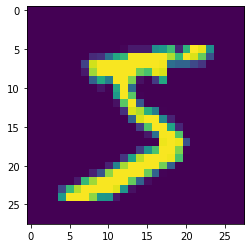

In [6]:
# Visualise
plt.imshow(x_train[0])

In [13]:
# Convert into vector
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train.max()

1.0

# **MODEL**

In [20]:
# Input layer
Input_layer = Input(shape=(x_train.shape[1]), name="input")
# Bottleneck
Bottleneck = Dense(32, activation="relu", name="bottleneck")(Input_layer)
# Output layer
Output = Dense(x_train.shape[1], activation="sigmoid", name="output")(Bottleneck)

In [21]:
autoencoder = Model(Input_layer, Output)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [22]:
encoder = Model(Input_layer, Bottleneck)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [23]:
encoded_layer = Input( shape= (32, ), name="encoded_layer")
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_layer, decoder_layer(encoded_layer))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_layer (InputLayer)  [(None, 32)]              0         
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [25]:
autoencoder.compile(loss="mse", optimizer="adam")
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0549
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0257
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0183
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0147
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0127
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0116
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0111
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0108
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0106
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0105
Epoch 11/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0104
Epoch 12/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0104
Epoch 13/20
469/469 [====

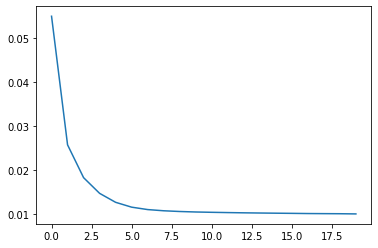

In [26]:
plt.plot(history.history['loss'])

In [27]:
encoded_data = encoder.predict(x_test, batch_size=512)
encoded_data.shape

20/20 [==============================] - 0s 2ms/step


(10000, 32)

In [29]:
output_data = decoder.predict(encoded_data, batch_size=512)
output_data.shape

20/20 [==============================] - 0s 2ms/step


(10000, 784)

In [30]:
output_data = output_data.reshape(output_data.shape[0],28,28)
output_data.shape

(10000, 28, 28)

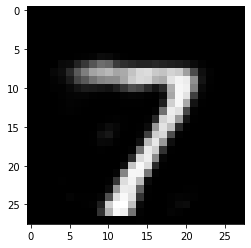

In [31]:
# This image was generated from a compressed version of the input image
plt.imshow(output_data[0], cmap="gray")

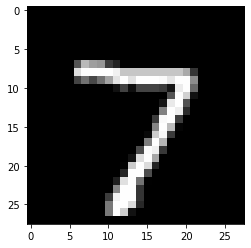

In [32]:
x_test = x_test.reshape(10000, 28, 28)

plt.imshow(x_test[0], cmap="gray")